# Introduction to Implementing Neural Networks from Scratch

## Generate the dataset

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [62]:
seed = 145
np.random.seed(seed)
n_samples = 300
noise = 0.2
X, y = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=seed)

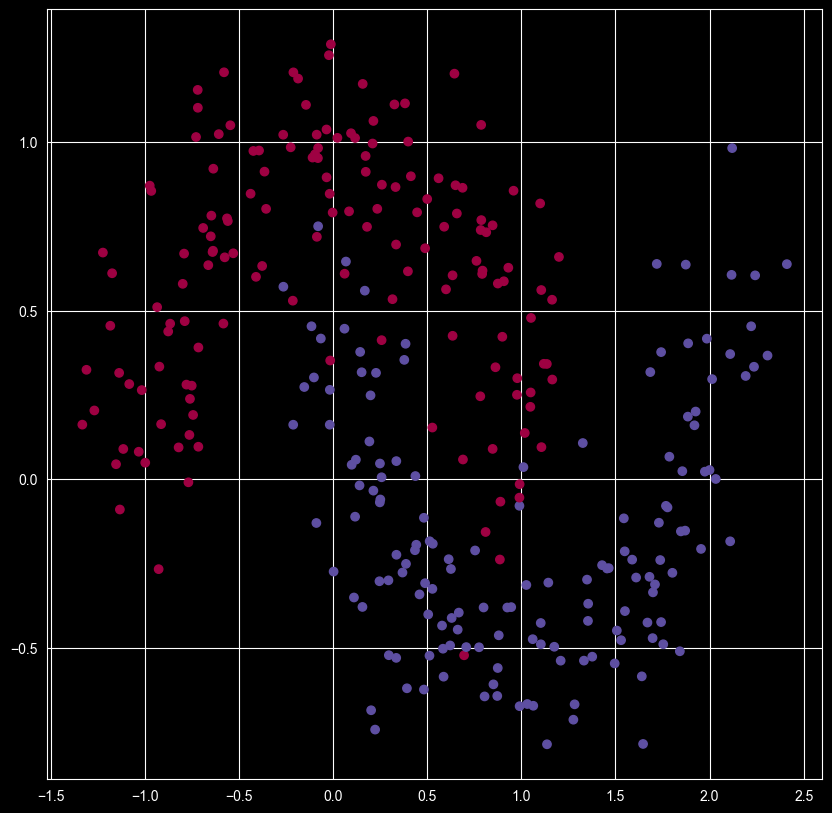

In [63]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

plt.show()

In [64]:
X.shape, y.shape

((300, 2), (300,))

In [65]:
# IMPORTANT: We have to reshape y to be (m, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((300, 2), (300, 1))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 2), (60, 2), (240, 1), (60, 1))

## Implement the Neural Network

### Forward Propagation
$ Z^{[1]} = W^{[1]T}.X + b^{[1]} $ \
$ A^{[1]} = g^{[1]}(Z^{[1]}) $ \
$ Z^{[2]} = W^{[2]T}.A^{[1]} + b^{[2]} $ \
$ A^{[2]} = g^{[2]}(Z^{[2]}) = \hat{y} $

In [67]:
def initialize_randomly(input_dim, hidden_dim, output_dim):

    # Weights scaled by 0.01 to keep the values small
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01
    b1 = np.zeros((1, hidden_dim))

    W2 = np.random.rand(hidden_dim, output_dim) * 0.01
    b2 = np.zeros((1, output_dim))

    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parameters

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

In [ ]:
def relu(z):
    return np.maximum(0, z)